In [1]:
#подключение api
import os, sys
cwd = os.getcwd()
print(type(cwd))
project_path = cwd[:cwd.find('aigents')+7]
if project_path not in sys.path: sys.path.append(project_path)
os.chdir(project_path) 

import datetime as dt

if 'pygents.aigents_api' in sys.modules:
    del sys.modules['pygents.aigents_api']

from pygents.aigents_api import AigentsSentiment


a = AigentsSentiment(api_url='https://aigents.com/al',debug=False)
#debug = False/True для отключения/включения вывода работы модели
a


<class 'str'>


In [2]:
import pandas as pd
import numpy as np
from tqdm import trange
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix


In [3]:
df = pd.read_csv('news.csv', encoding = 'ISO-8859-1')

Данные в тестовом датасете представляют собой текст некоторой длины и заранее определённую метку. Тестовый датасет предназначен для работы с finbert, т.к размечен под него.

Пример данных:

**text** {treatment products in Usa , Canada , Mexico , Australia and Brazil Today , Global Research & Data Services is going to publish several market analyses about the markets for water treatment products in some selected countries .}

**sentiment** {negative}

In [5]:
texts = df['headline'].to_list()
results = []
for i in trange(len(texts)):
    s = a.get_sentiment(texts[i])
    results.append(list(s)[1:3])
    #results.append(list(s))
    #print(results[i])
    
    


100%|████████████████████████████████████████████| 4846/4846 [09:18<00:00,  8.68it/s]


Пример выходных данных:
**text** : Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .

**json** : [{"negative":"31","negatives":["square"],"positive":"0","positives":[],"sentiment":"-31","text":"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said ."}]



По умолчанию, метод **get_sentiment** возвращает кортеж из 6 значений, где:

0. sentimnet => sen = float(item['sentiment']) / 100
1. positive = >pos = float(item['positive']) / 100 if 'positive' in item.keys() else 0
2. negative = >neg = -float(item['negative']) / 100 if 'negative' in item.keys() else 0
4. contradictive => con = round(math.sqrt(pos * -neg),2)
5. размер текста
6. количество текстов

In [10]:
i = 0
result_list = []
for item in results:
    if abs(item[0]) > abs(item[1]):
        result_list.append('positive')
    elif abs(item[0]) < abs(item[1]):
        result_list.append('negative')
    elif abs(item[0]) == abs(item[1]):
        result_list.append('neutral')
    i+=1
#первый способ выделения метки neutral
    

In [7]:
result_list_1 = []
for item in results:
    item[1] = abs(item[1])
for item in results:
    item.append(1-abs(item[0]-item[1]))
labels = {2:'neutral', 0:'positive',1:'negative'}
result_list = []
for item in results:
    result_list_1.append((labels[np.argmax(item)]))
#второй способ выделения метки neutral

In [12]:
print(classification_report(df['sentiment'],result_list))#точность первого способа выбора neutral

              precision    recall  f1-score   support

    negative       0.32      0.32      0.32       604
     neutral       0.64      0.50      0.56      2879
    positive       0.36      0.52      0.43      1363

    accuracy                           0.49      4846
   macro avg       0.44      0.45      0.44      4846
weighted avg       0.52      0.49      0.49      4846



In [14]:
print(classification_report(df['sentiment'],result_list_1))#точность второго способа выбора neutral

              precision    recall  f1-score   support

    negative       0.38      0.08      0.13       604
     neutral       0.60      0.87      0.71      2879
    positive       0.37      0.14      0.20      1363

    accuracy                           0.57      4846
   macro avg       0.45      0.36      0.35      4846
weighted avg       0.51      0.57      0.49      4846



In [15]:
cm_0 = confusion_matrix(result_list,df['sentiment'], labels = ['neutral','positive','negative'])
#confusion martix первого способа выбора neutral

In [16]:
cm_0

array([[1447,  538,  290],
       [1141,  715,  123],
       [ 291,  110,  191]], dtype=int64)

Text(50.722222222222214, 0.5, 'actual')

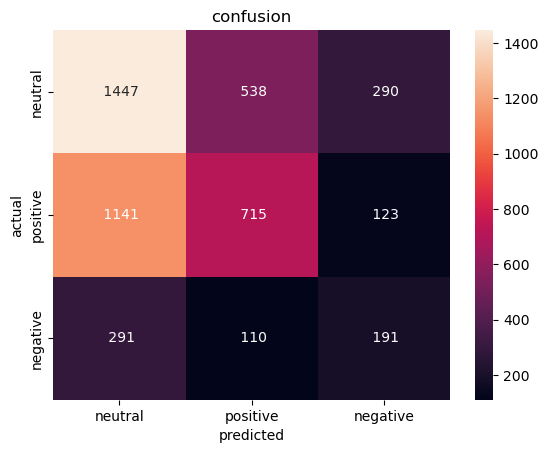

In [17]:
sns.heatmap(cm_0,
            annot= True,
            xticklabels = ['neutral','positive','negative'],
            yticklabels = ['neutral','positive','negative'],
            fmt = ' d')
plt.title('confusion')
plt.xlabel('predicted')
plt.ylabel('actual')

In [18]:
cm_1 = confusion_matrix(result_list_1,df['sentiment'], labels = ['neutral','positive','negative'])
#confusion martix второго способа выбора neutral

In [19]:
cm_1

array([[2509, 1151,  541],
       [ 313,  192,   15],
       [  57,   20,   48]], dtype=int64)

Text(50.722222222222214, 0.5, 'actual')

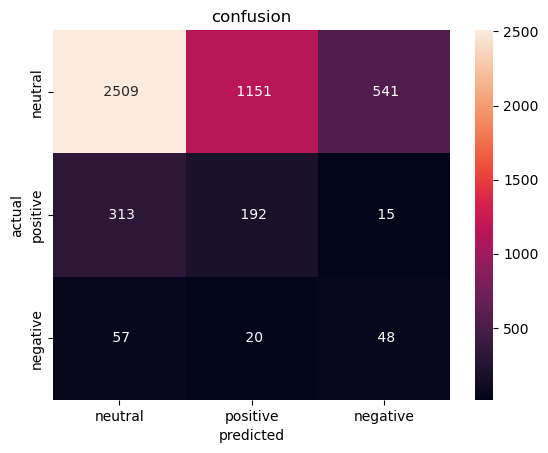

In [20]:
sns.heatmap(cm_1,
            annot= True,
            xticklabels = ['neutral','positive','negative'],
            yticklabels = ['neutral','positive','negative'],
            fmt = ' d')
plt.title('confusion')
plt.xlabel('predicted')
plt.ylabel('actual')